In [5]:
%matplotlib inline
import numpy as np
import pymc3 as pm
import scipy.stats as sps
import matplotlib.pyplot as plt

In [15]:
lambda1 = 1
lambda2 = 0.7

In [40]:
x1 = sps.expon.rvs(loc=0,scale=1/lambda1,size=1000)
x2 = sps.expon.rvs(loc=0,scale=1/lambda2,size=1500)

(array([0.55094756, 0.51133695, 0.35289451, 0.28087523, 0.21425738,
        0.18544967, 0.14763954, 0.09722604, 0.09722604, 0.05941591,
        0.06661784, 0.02880772, 0.02340627, 0.01440386, 0.01260338,
        0.01260338, 0.00900241, 0.01440386, 0.00720193, 0.00540145,
        0.00180048, 0.        , 0.00180048, 0.00180048, 0.        ,
        0.        , 0.        , 0.00180048, 0.        , 0.00180048]),
 array([1.27294491e-04, 3.70398471e-01, 7.40669647e-01, 1.11094082e+00,
        1.48121200e+00, 1.85148318e+00, 2.22175435e+00, 2.59202553e+00,
        2.96229670e+00, 3.33256788e+00, 3.70283906e+00, 4.07311023e+00,
        4.44338141e+00, 4.81365258e+00, 5.18392376e+00, 5.55419494e+00,
        5.92446611e+00, 6.29473729e+00, 6.66500846e+00, 7.03527964e+00,
        7.40555082e+00, 7.77582199e+00, 8.14609317e+00, 8.51636435e+00,
        8.88663552e+00, 9.25690670e+00, 9.62717787e+00, 9.99744905e+00,
        1.03677202e+01, 1.07379914e+01, 1.11082626e+01]),
 <a list of 30 Patch objects

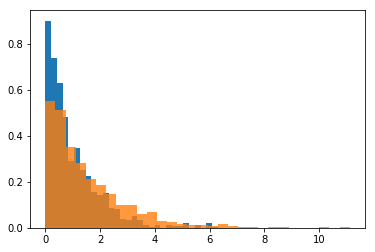

In [41]:
plt.hist(x1,bins=30,density=True)
plt.hist(x2,bins=30,alpha=0.8,density=True)

In [49]:
with pm.Model() as model:
    lam1 = pm.Uniform('lam1',lower=0,upper=5)
    lam2 = pm.Uniform('lam2',lower=0,upper=5)
    
    dist1 = pm.Exponential('dist1',lam=lam1,observed=x1)
    dist2 = pm.Exponential('dist2',lam=lam2,observed=x2)

In [50]:
with model:
    trace = pm.sample(5000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [lam2, lam1]
Sampling 2 chains: 100%|██████████| 11000/11000 [00:05<00:00, 2184.44draws/s]
The acceptance probability does not match the target. It is 0.8813954905841909, but should be close to 0.8. Try to increase the number of tuning steps.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1dc53b00>,
      dtype=object)

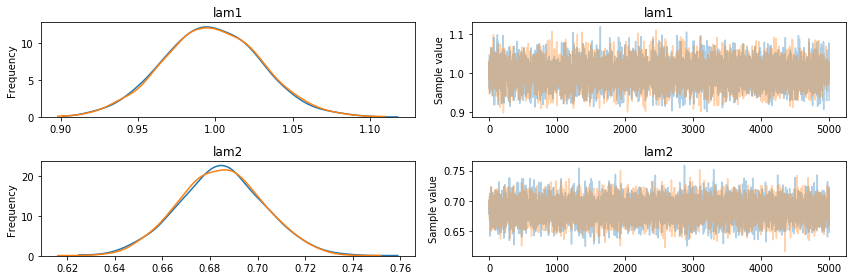

In [51]:
pm.traceplot(trace)

In [52]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
lam1,0.997875,0.031441,0.000339,0.936932,1.060278,10488.027351,0.999987
lam2,0.684751,0.017728,0.000163,0.648745,0.718089,10599.679270,0.999923


In [53]:
lam1_sample = trace['lam1']
lam2_sample = trace['lam2']

In [54]:
delta = lam1_sample-lam2_sample

(array([ 0.13078351,  0.71161618,  2.81184557,  6.93152628, 10.72809478,
         9.72798555,  5.30442549,  1.63479393,  0.41158341,  0.07308491]),
 array([0.1879635 , 0.21396066, 0.23995782, 0.26595498, 0.29195214,
        0.3179493 , 0.34394646, 0.36994362, 0.39594078, 0.42193794,
        0.4479351 ]),
 <a list of 10 Patch objects>)

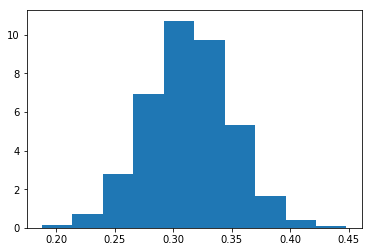

In [55]:
plt.hist(delta,density=True)